# HandWritten Digit Recognition Using MNIST Datset using Python Sklearn library

In [ ]:
from sklearn.datasets import fetch_openml

#avoid any kind of warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load the dataset
mnist = fetch_openml('mnist_784')

In [ ]:
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)

print(mnist.target.shape)

(70000, 784)
(70000,)


In [ ]:
# separate the dataset in two parts as features and target
x, y = mnist['data'], mnist['target']

* If you see the x, it's a one dimensional data
* to see the feature as image we have to reshape it into 28*28
* so, to plot it we will use matplotlib 
* we need to reshape it into 28*28 because it is a 1-D array and rows are stacked in form of digit.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# I will show the example of any 1 label by plotting it, let's check
some_digit = x.iloc[[161]]
some_digit_image = some_digit.values.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

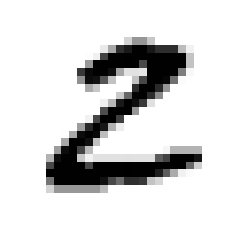

In [ ]:
#plot an image
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

**You can try with different images by using different labels**

In [ ]:
# le's see it's label
y[161]    #YEAHH!.. it's a 2 only

'2'

## Splitting Dataset into Training and Test set(MNIST)

**The mnist dataset is pre splitted by someone that the first 60000 images are in trained set and last 10000 are a test set. so we will move with this only**

In [ ]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

- you can split the dataset using train-test split using test ratio as 1/7.0 and set the random_state and it will be splitted randomly 60000 train and 10000 test data size.

In [ ]:
# here, i will be shuffling the train dataset to avoid that model learn noise and to include each kind of dataset in training
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train.values[shuffle_index], y_train.values[shuffle_index]

### Showing the images and labels(MNIST)

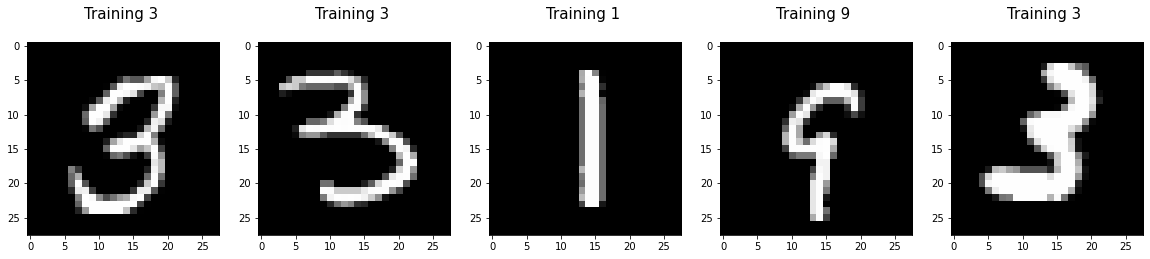

In [ ]:
plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(x_train[5:10], y_train[5:10])):
  plt.subplot(1,5, index+1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
  plt.title("Training %i \n" %np.int8(label), fontsize=15)

**As, it is a classification problem, but not a binary classification. I will give one example in this as by building a 2-detector that is this a 2 or not then we will apply this on training dataset and regognize the digits**

## Building a 2-Detector

In [ ]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [ ]:
y_train_2
# the chances for appearing a 2 only 10% among0-9 so it's showing mostly False.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(tol=0.1)

In [ ]:
log_clf.fit(x_train,y_train_2)

LogisticRegression(tol=0.1)

In [ ]:
# let's test it on our previous label which we plot as 2
log_clf.predict(some_digit)
# WOW!. nice, it has predicted correctly.

array([ True])

In [ ]:
# we can also cross-validate it and know the score, let's do that also.
from sklearn.model_selection import cross_val_score

cross_val_score(log_clf, x_train, y_train_2, scoring="accuracy")

array([0.97808333, 0.97991667, 0.97941667, 0.97841667, 0.97733333])

**It's very good. we got a accuracy of 97 per cent. But it's simply a binary classification. now we will go and apply this on our training dataset**

In [ ]:
# create a new instance of model
clf = LogisticRegression(solver='lbfgs')

In [ ]:
clf.fit(x_train, y_train) 
# it will take some time to train, please wait!.

LogisticRegression()

In [ ]:
# predict the labels of new data(new images)
#it will return a numpy array
test=x_test.iloc[[0]]
clf.predict(test.values.reshape(1,-1))

array([7], dtype=int8)

In [ ]:
# check the predicted label
y_test.iloc[0]

7

In [ ]:
# predict for multiple observation(many images)
print("Predicted labels")
my_pred = clf.predict(x_test[0:10])
print(my_pred)
print("\nTrue Labels")
y_test[0:10]  
# we can see that only 1 point is mis-classified

Predicted labels
[7 2 1 0 4 1 4 9 6 9]

True Labels


60000    7
60001    2
60002    1
60003    0
60004    4
60005    1
60006    4
60007    9
60008    5
60009    9
Name: class, dtype: int8

In [ ]:
# make prediction on entire dataset
predictions = clf.predict(x_test)

## Measuring Model Performance(MNIST)
- there are many metrics to measure the performance, for the ease of simplicity I am going to use accuracy score only. 

In [ ]:
score = clf.score(x_test, y_test)
print(f"accuracy score : {score}")

accuracy score : 0.9255


**The score is still very nice, 92 percent accuracy**

## Displaying the misclassified images with predicted labels(MNIST) 

In [ ]:
index=0
misclassified_img = []
for label, predict in zip(y_test, predictions):
  if label != predict:
    misclassified_img.append(index)
  index += 1

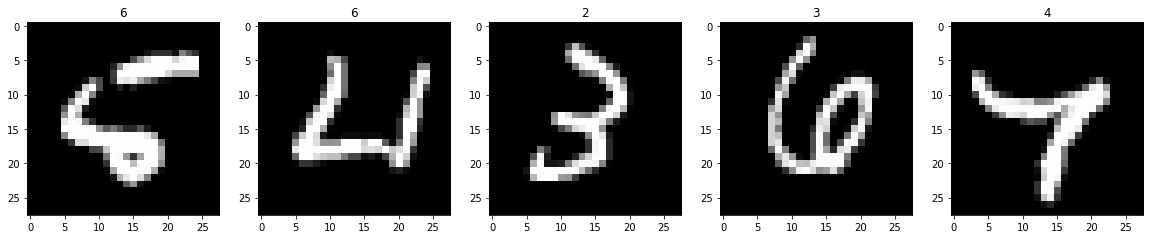

In [ ]:
plt.figure(figsize=(20,4))
for plotindex,misindex in enumerate(misclassified_img[0:5]):
  plt.subplot(1, 5, plotindex+1)
  M=x_test.iloc[[misindex]]
  plt.imshow(np.reshape(M.values, (28,28)), cmap=plt.cm.gray)
  plt.title(predictions[misindex])

**Have you enjoyed the peoject till here, The important thing is making a Machine learning model in Sklearn is not a lot of work. The main thing is to get the concepts which are running behind it. I hope the notebook help you to find the best from this and whatever you motive for project is.**

**Thank you so much.**